# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [6]:
#Your code here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [8]:
directory_path = '/content/drive/MyDrive/data'
data=tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    labels='inferred',
    class_names=['Elephants','Tiger','Cheetah','Crocodile'],
    label_mode='categorical',
    image_size=(256,256)
    )

Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [4]:
data_iterator=data.as_numpy_iterator()

In [5]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]


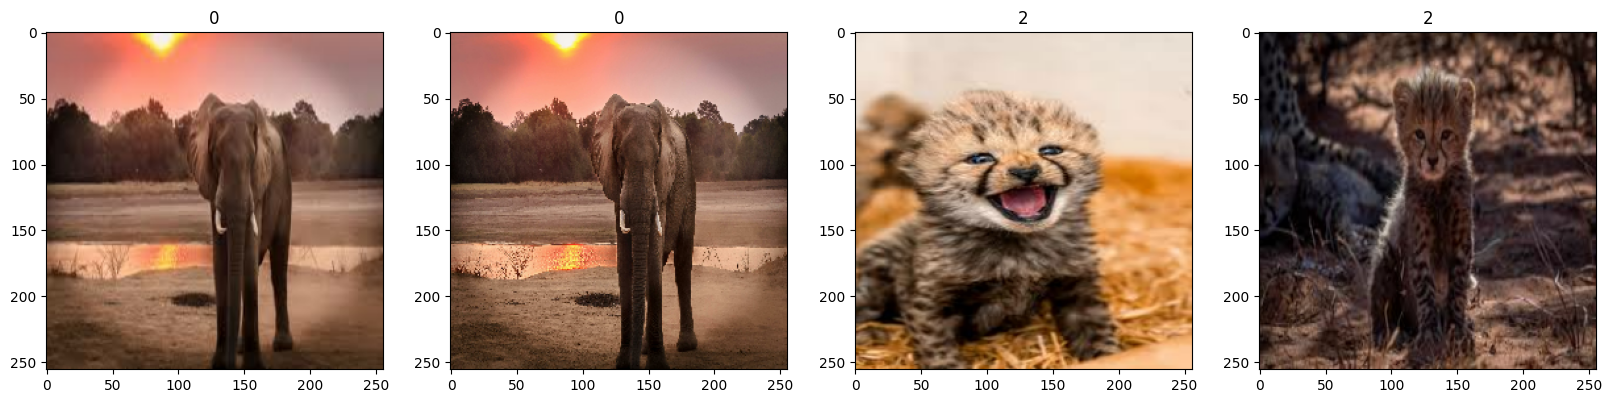

In [12]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  print(batch[1][idx])
  ax[idx].title.set_text(batch[1][idx].argmax())

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [13]:
data=data.map(lambda x,y: (x/255,y))


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [14]:
#Your code here
train_size=int(len(data)*0.9)
test_size=int(len(data)*0.1)
train_data=data.take(train_size)
test_data=data.skip(train_size)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,MaxPooling2D,Dense
model=Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(4, activation='softmax')

])



**Q.6** Compile your model

In [24]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [25]:
model.fit(train_data,batch_size = 32,epochs = 15)

Epoch 1/15
46/46 [==============================] - 210s 4s/step - loss: 1.5641 - accuracy: 0.3750
Epoch 2/15
46/46 [==============================] - 15s 280ms/step - loss: 1.0158 - accuracy: 0.5774
Epoch 3/15
46/46 [==============================] - 16s 306ms/step - loss: 0.6799 - accuracy: 0.7480
Epoch 4/15
46/46 [==============================] - 14s 272ms/step - loss: 0.3673 - accuracy: 0.8757
Epoch 5/15
46/46 [==============================] - 14s 274ms/step - loss: 0.1881 - accuracy: 0.9348
Epoch 6/15
46/46 [==============================] - 14s 275ms/step - loss: 0.1199 - accuracy: 0.9660
Epoch 7/15
46/46 [==============================] - 15s 301ms/step - loss: 0.0558 - accuracy: 0.9844
Epoch 8/15
46/46 [==============================] - 15s 279ms/step - loss: 0.0607 - accuracy: 0.9823
Epoch 9/15
46/46 [==============================] - 14s 276ms/step - loss: 0.0791 - accuracy: 0.9742
Epoch 10/15
46/46 [==============================] - 14s 274ms/step - loss: 0.0441 - accuracy

**Q.8** Test your code with test set

In [26]:
loss,accuracy=model.evaluate(test_data)

6/6 [==============================] - 14s 136ms/step - loss: 0.0018 - accuracy: 1.0000


In [27]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 1.0


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**